**Wine Quality Prediction - Machine Learning Use Case **

YouTube Video with Explanation:
https://www.youtube.com/watch?v=e0SgOzGQ4Xw




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle as pckl
import seaborn


### Exploratory Data Analysis

In [ ]:
#Define a path variable
path = "/content/drive/MyDrive/Machine Learning - Use Cases {public}/"


In [ ]:
df = pd.read_csv(path+"datafiles/winequality-red.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

In [ ]:
print(X)
print(y)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

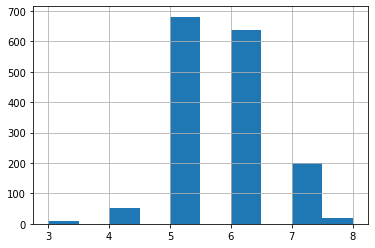

In [ ]:
hist = y.hist(bins=10)

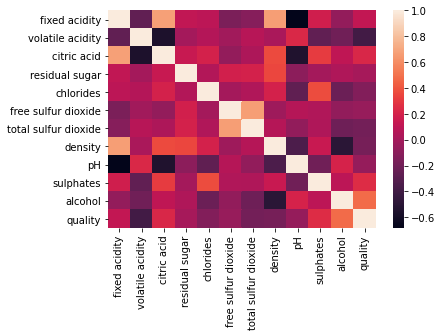

In [ ]:
seaborn.heatmap(df.corr())


### Transform Data




In [ ]:
#Split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Machine Learning!

In [ ]:
#Train Model
wine_quality_model = RandomForestClassifier(n_estimators=128)
wine_quality_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=128,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Predict
y_pred = wine_quality_model.predict(X_test)



In [ ]:
#Evaluate Model: Confusion Matrix

cmatrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cmatrix)

Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   0  12   3   1   0]
 [  0   0 142  28   1   0]
 [  0   0  43 114  10   0]
 [  0   0   4  20  18   0]
 [  0   0   0   0   2   1]]


In [ ]:
#Overall Accuracy, Precision_score and Recall
from sklearn.metrics import precision_score, recall_score, accuracy_score


precision_metric = precision_score(y_test, y_pred, average = "macro")
recall_metric = recall_score(y_test, y_pred, average = "macro")
accuracy_metric = accuracy_score(y_test, y_pred)



print('Precision score: {0:0.4f}'.format(precision_metric))
print('Recall score: {0:0.4f}'.format(recall_metric))
print('Accuracy score: {0:0.4f}'.format(accuracy_metric))

Precision score: 0.4927
Recall score: 0.3792
Accuracy score: 0.6875


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Evaluate Model: Classification Report

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        16
           5       0.70      0.83      0.76       171
           6       0.69      0.68      0.69       167
           7       0.56      0.43      0.49        42
           8       1.00      0.33      0.50         3

    accuracy                           0.69       400
   macro avg       0.49      0.38      0.41       400
weighted avg       0.66      0.69      0.67       400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Save Model

In [ ]:
#Save the trained model for future use
pckl.dump(wine_quality_model, open(path+'models/wine_quality_model.pckl', 'wb'))

### Datasets used here
https://archive.ics.uci.edu/ml/datasets/wine+quality

Source:

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009


Citation Request:

Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

---

